In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.physics.mechanics import vlatex
from scipy.integrate import solve_ivp
from IPython.display import display, Math

from src.systems.reaction_wheel import ReactionWheel, RWParams
from src.systems.system.system import RoboticSystem as RS
from src.metrics.metrics import Metrics, MetricsConfig


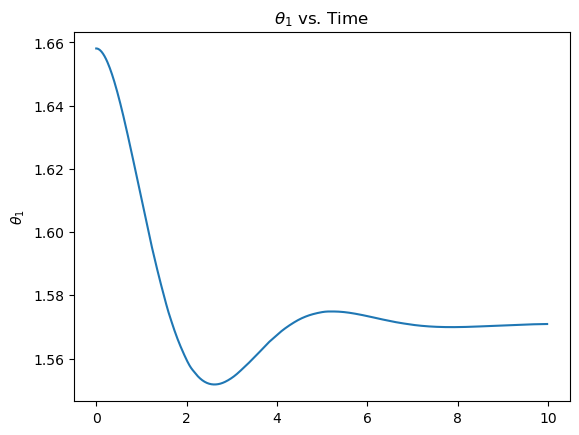

In [2]:
system = ReactionWheel(
    RWParams(
        l_1=0.25,
        l_c1=0.125,
        m_1=1,
        m_2=0.5,
        r=0.076,
        metrics=Metrics(MetricsConfig(progressive=False))
    )
)

duration = 10
fps: int = 60                   # (frames/sec)
frames: int = fps * duration    # rendered frames (frames)
dt: float = 1 / fps             # timestep (sec)

t_range = np.linspace(0, duration, frames, endpoint=False)

Q = solve_ivp(
    fun=system.deriv,
    t_span=(0, duration),
    y0=np.array([np.pi/2 + np.pi/36, 0, 0, 0]),
    method="DOP853",
    t_eval=t_range
).y

plt.title("$\\theta_1$ vs. Time")
plt.ylabel("$\\theta_1$")
plt.plot(t_range, Q[0])
plt.show()


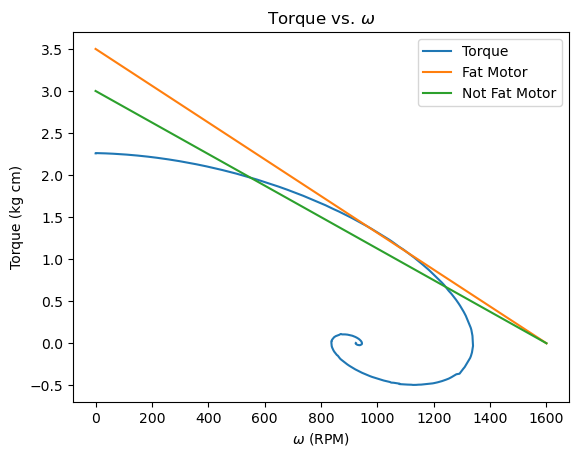

In [3]:
plt.title("Torque vs. $\\omega$")
plt.xlabel("$\\omega$ (RPM)")
plt.ylabel("Torque (kg cm)")
plt.plot(
    [system.out_vals[k][1] * (30 / np.pi) for k in sorted(system.out_vals.keys())],
    [(system.out_vals[k][0] / 9.81) * 100 for k in sorted(system.out_vals.keys())],
    label="Torque"
)

plt.plot(
    np.linspace(0, 1600, 1600),
    np.linspace(3.5, 0, 1600),
    label="Fat Motor"
)

plt.plot(
    np.linspace(0, 1600, 1600),
    np.linspace(3, 0, 1600),
    label="Not Fat Motor"
)
plt.legend()
plt.show()
